# Description and Modules
This project was a continuation of my previous Machine Learning project using Logistic Regression to predict whether it is going to rain in Boise today. The goal of this project was to increase the accuracy of my model by +5% using Feature Engineering Techniques.

The K-Fold validation of my previous model produced an accuracy of 82.7% so the goal of this assignment is to reach an accuracy of 88%. In the previous HW4, I decided to delete a significant amount of rows that contained null values. This time, I utilized other data sources to manually input the precipitation for rows in which that column was null. By doing this, I was able to preserve nearly every row in the 10 years of weather data within the 'weather.csv'

Boise Weather Data was found from NOAA:
https://www.ncdc.noaa.gov/cdo-web/

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection

In [2]:
weather = pd.read_csv("Weather.csv")
weather.head()

,DATE,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1/1/2012,1,0,1,0,0,20,38,54,30.57,...,140.0,24,0.0,0,0.0,150,18,0,0.07,-4
1,1/2/2012,1,0,1,0,0,23,38,63,30.36,...,140.0,28,0.0,0,0.0,140,22,0,0.00,9
2,1/3/2012,1,0,1,0,0,25,38,68,30.44,...,130.0,15,0.0,0,0.0,130,12,0,0.00,5
3,1/4/2012,1,0,1,0,0,26,38,66,30.46,...,140.0,18,0.0,0,0.0,140,15,0,0.43,-2
4,1/5/2012,1,0,1,0,0,27,37,71,30.28,...,300.0,13,0.0,0,0.0,300,12,0,0.03,5


In [3]:
weather = weather.iloc[: , 1:]
feature_names = ['Fall','Winter','Spring','Summer','DailyAverageDryBulbTemperature','DailyAverageDewPointTemperature','DailyAverageRelativeHumidity','DailyAverageWindSpeed','DailyPeakWindSpeed','DailyAverageStationPressure','DailyDepartureFromNormalAverageTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather[feature_names]
Y = weather.willRain

In [4]:
weather.head()

,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1,0,1,0,0,20,38,54,30.57,27.49,...,140.0,24,0.0,0,0.0,150,18,0,0.07,-4
1,1,0,1,0,0,23,38,63,30.36,27.30,...,140.0,28,0.0,0,0.0,140,22,0,0.00,9
2,1,0,1,0,0,25,38,68,30.44,27.39,...,130.0,15,0.0,0,0.0,130,12,0,0.00,5
3,1,0,1,0,0,26,38,66,30.46,27.39,...,140.0,18,0.0,0,0.0,140,15,0,0.43,-2
4,1,0,1,0,0,27,37,71,30.28,27.24,...,300.0,13,0.0,0,0.0,300,12,0,0.03,5


# Test/Train Data and Model Creation

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=0)

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)

logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [7]:
from sklearn import metrics
print("Initial Accuracy:",metrics.accuracy_score(y_test, y_pred))

Initial Accuracy: 0.8668730650154799


In [9]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Initial Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Initial Accuracy: 88.20%


In our dataset, it rains in Boise roughly 27% of the time. So we would expect that our model attempts to guess that is didn't rain at least 75% of the time.

In [10]:
weather['willRain'].mean()

0.2732342007434944

Text(0.5, 0, 'Importance')

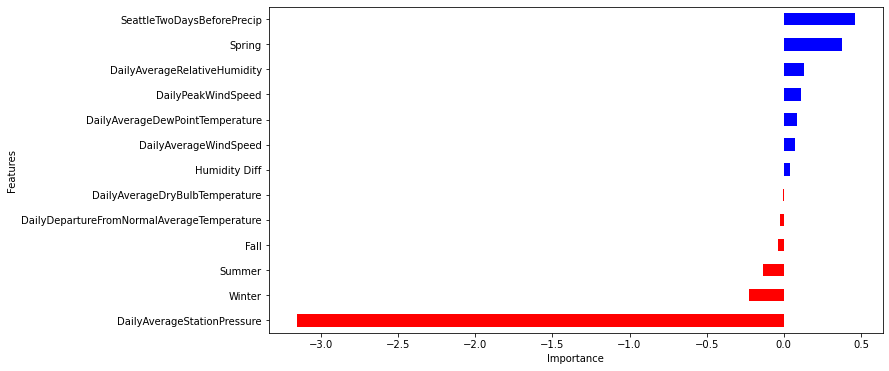

In [11]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features.importance.plot(kind='barh', figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# New Model, limiting Features

Based on this coefficient analysis, I am going to remove DailyDepartureFromNormalAverageTemperature and  DailyAverageDryBulbTemperature.

In [13]:
feature_names = ['Fall','Winter','Spring','Summer','DailyAverageStationPressure','DailyPeakWindSpeed','DailyAverageRelativeHumidity','DailyAverageDewPointTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather[feature_names]
Y = weather.willRain

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,Y, test_size=0.30, random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=5000)

logreg.fit(X_train,y_train)
result = logreg.score(X_test, y_test)

print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 87.10%


In [16]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 88.11%


By removing those two features, the linear_model score increased from 86.7% to 87.10%. However, the K-Fold accuracy dropped by 0.10%. For now, I am going to keep those features out as I am hoping to have a composite accuracy. 
Next, I will apply the Min-max scaler on numeric columns.

In [17]:
from sklearn import preprocessing
values = weather.values
min_max_scaler = preprocessing.MinMaxScaler()

weather_min_scaled = weather
weather_min_scaled[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageRelativeHumidity','DailyAverageStationPressure','DailyPeakWindSpeed','DailySustainedWindSpeed','Humidity Diff']] = min_max_scaler.fit_transform(weather[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageRelativeHumidity','DailyAverageStationPressure','DailyPeakWindSpeed','DailySustainedWindSpeed', 'Humidity Diff']])

weather_min_scaled

,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1,0,1,0,0,0.397059,0.427083,0.482353,30.57,0.775362,...,140.0,0.314815,0.00,0,0.0,150,0.292683,0,0.07,0.3750
1,1,0,1,0,0,0.441176,0.427083,0.588235,30.36,0.637681,...,140.0,0.388889,0.00,0,0.0,140,0.390244,0,0.00,0.5375
2,1,0,1,0,0,0.470588,0.427083,0.647059,30.44,0.702899,...,130.0,0.148148,0.00,0,0.0,130,0.146341,0,0.00,0.4875
3,1,0,1,0,0,0.485294,0.427083,0.623529,30.46,0.702899,...,140.0,0.203704,0.00,0,0.0,140,0.219512,0,0.43,0.4000
4,1,0,1,0,0,0.500000,0.416667,0.682353,30.28,0.594203,...,300.0,0.111111,0.00,0,0.0,300,0.146341,0,0.03,0.4875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,12,0,1,0,0,0.441176,0.302083,0.917647,30.16,0.485507,...,280.0,0.129630,0.00,0,0.0,260,0.146341,0,0.00,0.3500
3224,12,0,1,0,0,0.426471,0.291667,0.917647,30.34,0.615942,...,170.0,0.111111,0.00,0,0.0,160,0.097561,0,0.00,0.4250
3225,12,0,1,0,0,0.441176,0.333333,0.752941,30.26,0.550725,...,150.0,0.388889,0.01,0,0.2,130,0.365854,1,0.00,0.2500
3226,12,0,1,0,0,0.529412,0.385417,0.882353,30.20,0.536232,...,130.0,0.111111,0.01,0,0.2,130,0.073171,1,0.02,0.5625


In [18]:
feature_names = ['Fall','Winter','Spring','Summer','DailyAverageStationPressure','DailyPeakWindSpeed','DailyAverageRelativeHumidity','DailyAverageDewPointTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather_min_scaled[feature_names]
Y = weather_min_scaled.willRain
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8658410732714138


In [19]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 87.92%


Surprisingly, this made the prediction worse for both tests. I believe this is because the model is heavily focused on Humidity, WindSpeed and DewPointTemperature. When these features are scaled, the models seem to be less heavily dependent on those features which may lead to less accuracy. 

Text(0.5, 0, 'Importance')

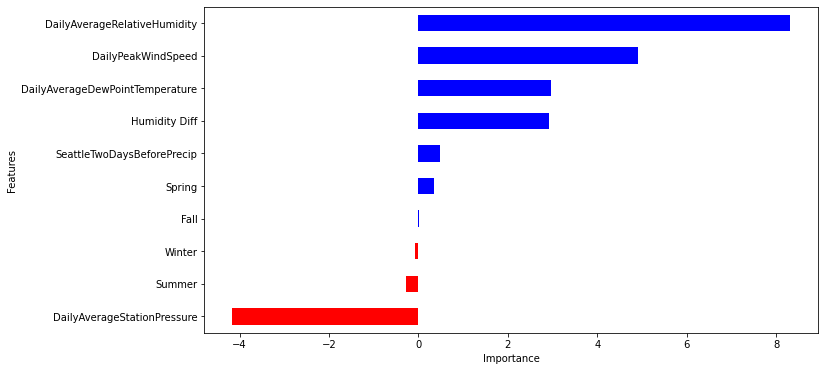

In [48]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features.importance.plot(kind='barh', figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Using the min-max scaler seemed to lower the importance of several key features will making the AverageRelativeHumidity importance skyrocket in the process. The accuracy score for both tests decreased by nearly 0.3%. I will proceed on and try using the standard scaler. 

In [50]:
values = weather.values
standard_scaler = preprocessing.StandardScaler()

weather_std_scaled = weather
weather_std_scaled[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageStationPressure','DailyPeakWindSpeed','DailySustainedWindSpeed', 'Humidity Diff']] = standard_scaler.fit_transform(weather[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageStationPressure','DailyPeakWindSpeed','DailySustainedWindSpeed', 'Humidity Diff']])

weather_std_scaled

,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1,0,1,0,0,-1.377739,-0.918881,0.482353,30.57,2.507453,...,140.0,0.032595,0.00,0,0.0,150,-0.017395,0,0.07,-0.384788
1,1,0,1,0,0,-1.070227,-0.918881,0.588235,30.36,1.430595,...,140.0,0.528316,0.00,0,0.0,140,0.645136,0,0.00,0.864419
2,1,0,1,0,0,-0.865219,-0.918881,0.647059,30.44,1.940686,...,130.0,-1.082778,0.00,0,0.0,130,-1.011191,0,0.00,0.480047
3,1,0,1,0,0,-0.762715,-0.918881,0.623529,30.46,1.940686,...,140.0,-0.710987,0.00,0,0.0,140,-0.514293,0,0.43,-0.192602
4,1,0,1,0,0,-0.660211,-0.975244,0.682353,30.28,1.090535,...,300.0,-1.330638,0.00,0,0.0,300,-1.011191,0,0.03,0.480047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,12,0,1,0,0,-1.070227,-1.595235,0.917647,30.16,0.240384,...,280.0,-1.206708,0.00,0,0.0,260,-1.011191,0,0.00,-0.576974
3224,12,0,1,0,0,-1.172731,-1.651598,0.917647,30.34,1.260565,...,170.0,-1.330638,0.00,0,0.0,160,-1.342456,0,0.00,-0.000417
3225,12,0,1,0,0,-1.070227,-1.426147,0.752941,30.26,0.750475,...,150.0,0.528316,0.01,0,0.2,130,0.479504,1,0.00,-1.345717
3226,12,0,1,0,0,-0.455203,-1.144333,0.882353,30.20,0.637121,...,130.0,-1.330638,0.01,0,0.2,130,-1.508089,1,0.02,1.056604


In [51]:
feature_names = ['Fall','Winter','Spring','Summer','DailyAverageRelativeHumidity','DailyAverageStationPressure','DailyAverageDryBulbTemperature','DailyPeakWindSpeed','DailyAverageDewPointTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather_std_scaled[feature_names]
Y = weather_std_scaled.willRain
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8699690402476781


In [52]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 87.49%


With the standard scaler, the accuracy dropped nearly 0.3% in the K-Fold validation but increased in the metrics accuracy score by nearly 0.4%. But are a lower accuracy than the original test. 

Text(0.5, 0, 'Importance')

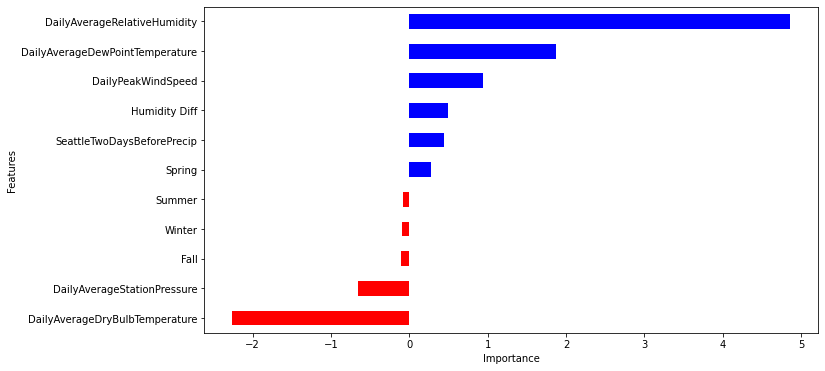

In [54]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features.importance.plot(kind='barh', figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Using the standard scaler, the accuracy_score percentage remained relatively the same as opposed to the min-max scaler. The absolute value of importance of DailyAverageDewPointTemperature and DailyAverageDryBulbTemperature lowered as compared to min-max scaler. 

In [56]:
values = weather.values
robust_scaler = preprocessing.RobustScaler()

weather_rob_scaled = weather
weather_rob_scaled[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageRelativeHumidity','DailyAverageStationPressure','DailyPeakWindSpeed','DailySustainedWindSpeed', 'Humidity Diff']] = robust_scaler.fit_transform(weather[['DailyAverageDewPointTemperature','DailyAverageDryBulbTemperature','DailyAverageStationPressure','DailyAverageRelativeHumidity','DailyPeakWindSpeed','DailySustainedWindSpeed', 'Humidity Diff']])

weather_rob_scaled

,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1,0,1,0,0,-1.076923,-0.551724,0.088235,30.57,2.190476,...,140.0,0.090909,0.00,0,0.0,150,0.125,0,0.07,-0.272727
1,1,0,1,0,0,-0.846154,-0.551724,0.352941,30.36,1.285714,...,140.0,0.454545,0.00,0,0.0,140,0.625,0,0.00,0.909091
2,1,0,1,0,0,-0.692308,-0.551724,0.500000,30.44,1.714286,...,130.0,-0.727273,0.00,0,0.0,130,-0.625,0,0.00,0.545455
3,1,0,1,0,0,-0.615385,-0.551724,0.441176,30.46,1.714286,...,140.0,-0.454545,0.00,0,0.0,140,-0.250,0,0.43,-0.090909
4,1,0,1,0,0,-0.538462,-0.586207,0.588235,30.28,1.000000,...,300.0,-0.909091,0.00,0,0.0,300,-0.625,0,0.03,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,12,0,1,0,0,-0.846154,-0.965517,1.176471,30.16,0.285714,...,280.0,-0.818182,0.00,0,0.0,260,-0.625,0,0.00,-0.454545
3224,12,0,1,0,0,-0.923077,-1.000000,1.176471,30.34,1.142857,...,170.0,-0.909091,0.00,0,0.0,160,-0.875,0,0.00,0.090909
3225,12,0,1,0,0,-0.846154,-0.862069,0.764706,30.26,0.714286,...,150.0,0.454545,0.01,0,0.2,130,0.500,1,0.00,-1.181818
3226,12,0,1,0,0,-0.384615,-0.689655,1.088235,30.20,0.619048,...,130.0,-0.909091,0.01,0,0.2,130,-1.000,1,0.02,1.090909


In [64]:
feature_names = ['Fall','Winter','Spring','DailyAverageStationPressure','DailyAverageRelativeHumidity','DailyAverageDryBulbTemperature','DailyPeakWindSpeed','DailyAverageDewPointTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather_rob_scaled[feature_names]
Y = weather_rob_scaled.willRain
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8740970072239422


In [65]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 88.35%


With the Robust Scaler, the K-Fold accuracy was the highest (88.35%) and the metrics accuracy score was the highest (87.4%)

Text(0.5, 0, 'Importance')

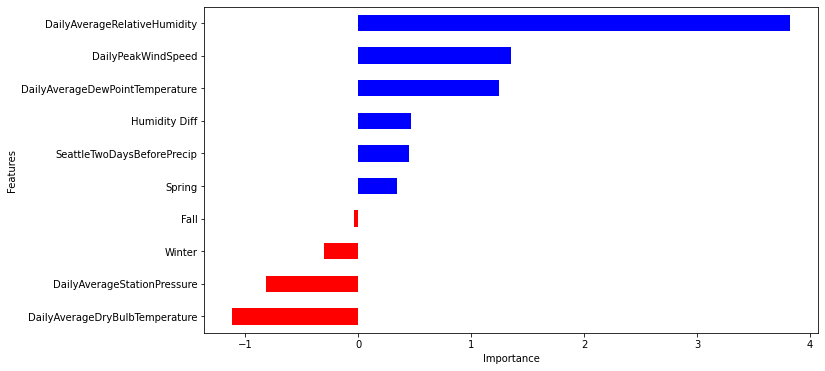

In [67]:
coeff = list(logreg.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace = True)
features.importance.plot(kind='barh', figsize=(11,6), color= features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

Final Submission:

In [70]:
weather_rob_scaled

,MONTH,Fall,Winter,Spring,Summer,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,willRain,SeattleTwoDaysBeforePrecip,Humidity Diff
0,1,0,1,0,0,-1.076923,-0.551724,0.088235,30.57,2.190476,...,140.0,0.090909,0.00,0,0.0,150,0.125,0,0.07,-0.272727
1,1,0,1,0,0,-0.846154,-0.551724,0.352941,30.36,1.285714,...,140.0,0.454545,0.00,0,0.0,140,0.625,0,0.00,0.909091
2,1,0,1,0,0,-0.692308,-0.551724,0.500000,30.44,1.714286,...,130.0,-0.727273,0.00,0,0.0,130,-0.625,0,0.00,0.545455
3,1,0,1,0,0,-0.615385,-0.551724,0.441176,30.46,1.714286,...,140.0,-0.454545,0.00,0,0.0,140,-0.250,0,0.43,-0.090909
4,1,0,1,0,0,-0.538462,-0.586207,0.588235,30.28,1.000000,...,300.0,-0.909091,0.00,0,0.0,300,-0.625,0,0.03,0.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,12,0,1,0,0,-0.846154,-0.965517,1.176471,30.16,0.285714,...,280.0,-0.818182,0.00,0,0.0,260,-0.625,0,0.00,-0.454545
3224,12,0,1,0,0,-0.923077,-1.000000,1.176471,30.34,1.142857,...,170.0,-0.909091,0.00,0,0.0,160,-0.875,0,0.00,0.090909
3225,12,0,1,0,0,-0.846154,-0.862069,0.764706,30.26,0.714286,...,150.0,0.454545,0.01,0,0.2,130,0.500,1,0.00,-1.181818
3226,12,0,1,0,0,-0.384615,-0.689655,1.088235,30.20,0.619048,...,130.0,-0.909091,0.01,0,0.2,130,-1.000,1,0.02,1.090909


In [72]:
feature_names = ['Fall','Winter','Spring','DailyAverageStationPressure','DailyAverageRelativeHumidity','DailyAverageDryBulbTemperature','DailyPeakWindSpeed','DailyAverageDewPointTemperature','SeattleTwoDaysBeforePrecip', 'Humidity Diff']
label = ['willRain']
X = weather_rob_scaled[feature_names]
Y = weather_rob_scaled.willRain
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.30, random_state=0)

logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8740970072239422


In [73]:
kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression(max_iter=5000)
results_kfold = model_selection.cross_val_score(model_kfold, X, Y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 88.35%


# Conclusion

Using K-Fold validation, this leads to an increase of an accuracy score of 5.55%. While limiting the number of features made slight improvements, the majority of improvements came from the addition of new features such as 'Humidity Diff' and 'SeattleTwoDaysBeforePrecip' which I manually added to the dataset and wasn't initially part of the first model. With these additions, I was able to make a jump from roughly an 82% accuracy to 88% accuracy to answer the question, "Will it rain today in Boise?" I really enjoyed this project and look forward to more projects like this in the future!